# Mobile Price Prediction Model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the Dataset

In [3]:
data = pd.read_csv("mobile_prices.csv", encoding="latin-1")

data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Data Preprocessing

In [4]:
all_features = [
    "battery_power", "blue", "clock_speed", "dual_sim", 
    "fc", "four_g", "int_memory", "m_dep", "mobile_wt", 
    "n_cores", "pc", "px_height", "px_width", "ram", "sc_h",
    "sc_w", "talk_time", "three_g", "touch_screen", "wifi"
]

X = data[all_features]
y = data["price_range"]

data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Split the Data into Training and Testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model

In [6]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predicting the Data

In [7]:
y_pred = forest.predict(X_test)

# Conduct Accuracy and Report

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 89.25
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



# Classifying the Data

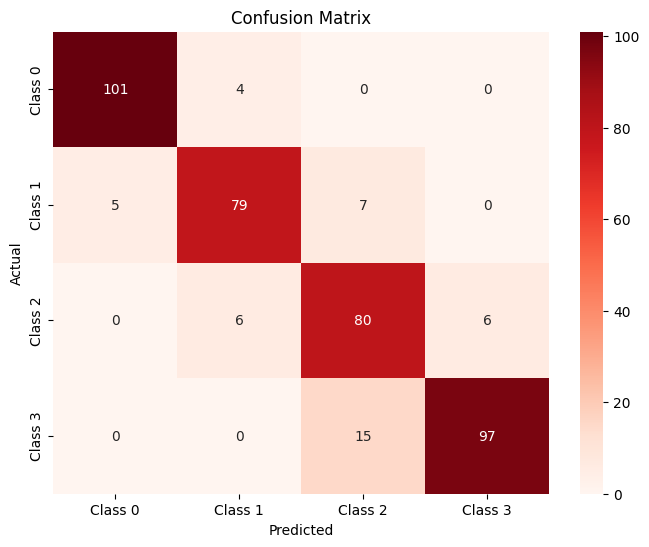

In [12]:
matrix = confusion_matrix(y_test, y_pred)
price_range_labels = ["Class 0", "Class 1", "Class 2", "Class 3"]

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Reds", xticklabels=price_range_labels, yticklabels=price_range_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Model Prediction

In [14]:
test_data = pd.DataFrame([[1021, 1, 0.5, 1, 0, 1, 53, 0.7, 136, 3, 6, 905, 1988, 2631, 17, 3, 7, 1, 1, 0]], columns=all_features)

predicted_price = forest.predict(test_data)

predicted_price_series = pd.Series(predicted_price)

mapped_price = predicted_price_series.map({0: "Class 0", 1: "Class 1", 2: "Class 2", 3: "Class 3"})

print(f"Predicted Price: {mapped_price[0]}")

Predicted Price: Class 2
